

## Simulate dataset

Put energy matrix into thermodynamic model, compute transcription rate, draw random random DNA counts from a probability distribution, use transcription rate to compute RNA counts given mutations

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import random

In [33]:
def plot_matrix(matrix, start, end):
    maximum = np.max(np.abs(matrix))
    fig,ax = plt.subplots(figsize=((10,2)))
    plt.imshow(-np.transpose(matrix), origin='upper', cmap='coolwarm', vmax=maximum, vmin=-maximum)
    plt.xlabel('Position')
    ax.set_yticks([0, 1, 2, 3])
    ax.set_yticklabels(['A','C','G','T'])
    ax.set_xticks(np.arange(0, len(matrix), step=5))
    ax.set_xticklabels(np.arange(start, end+1, step=5))
    ax.grid(False)
    plt.colorbar()

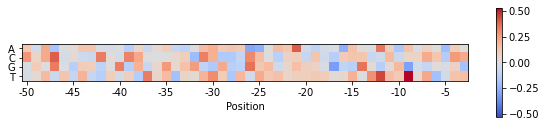

In [34]:
# Make energy matrix

# The core promoter elements in prokaryotes are two conserved hexamers located around 35 and 10 bp upstream 
# of the transcription start site (TSS) separated by a variable spacing of 15–21 bp. (Weindl 2007)

mu, sigma = -0.05, 0.15 # mean and standard deviation

def rnap_matrix(start, end):
    sect1 = np.random.normal(mu, sigma, size=(-35-start,4))
    sect2 = np.random.normal(mu, sigma, size=(-10+35,4)) # change this ??
    sect3 = np.random.normal(mu, sigma, size=(end+1+10,4))
    return np.concatenate((sect1, sect2, sect3))

#rnap_weights = np.random.uniform(low=-9e-1, high=1e-2, size=(40, 4))
rnap_weights = rnap_matrix(-50, -3)
plot_matrix(rnap_weights, -50, -3)

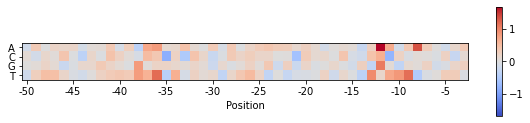

In [36]:
mu, sigma = -0.10, 0.2
def rnap_matrix2(start, end):
    entire = np.random.normal(mu, sigma, size=(end-start+1,4))
    # change six bp region around -35 and -10
    # change from - 38, -32 
    entire = np.delete(entire, slice(-38 - start, -32 - start), axis=0)
    binding_site = np.random.normal(mu, 0.7, size=(6,4))
    entire = np.insert(entire, -38 - start, binding_site, 0)
    
    # change -14, -8 region 
    entire = np.delete(entire, slice(-13 - start, -7 - start), axis=0)
    binding_site = np.random.normal(mu, 0.7, size=(6,4))
    entire = np.insert(entire, -13 - start, binding_site, 0)
    return entire

rnap_weights = rnap_matrix2(-50, -3)
plot_matrix(rnap_weights, -50, -3)

26


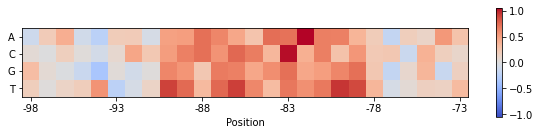

In [37]:
mu, sigma = -0.10, 0.2
site = (-90, -78)
def repressor_matrix(start, end, site):
    mat1 = np.random.normal(mu, sigma, size=(end-start+1, 4))
    mat2 = np.zeros((len(mat1), 4))
    mat2[(site[0]-start):(site[1]-start)] = 0.5
    return mat1-mat2

rep_weights = repressor_matrix(-98, -73, site)
                            
plot_matrix(rep_weights, -98, -73)
print(len(rep_weights))

In [6]:
# np.random.choice(np.arange(1, 7), p=[0.1, 0.05, 0.05, 0.2, 0.4, 0.2], size=100)

In [7]:
base = ['A', 'C', 'G', 'T']

bases = dict({0: 'A', 1: 'C', 2: 'G', 3:'T'})
seqs = dict()

In [14]:
def optimal_sequence(matrix, seq_name):
    seq = ''
    for row in matrix:
        loc = int(np.where(row == min(row))[0])
        seq += base[loc]
    seqs[seq_name] = seq
    return seq

rnap = optimal_sequence(rnap_weights, 'rnap')
repressor = optimal_sequence(rep_weights, 'rep')

In [38]:
# Stich together rnap and repressor
def make_wildtype(rnap, repressor):
    dna = list(rnap+repressor)
    for i in range(116):
        dna.insert(0, random.choice(base))
    for i in range(161):
        dna += [random.choice(base)]
    return ''.join(dna)

In [9]:
# Generate mutations
def mutate_sequences(sequence, mutate_rate):
    dna = list(sequence)
    for i in range(len(sequence)):
        r = random.random()
        if r < mutate_rate:
            nuc = 'ACGT'.replace(dna[i], '')
            dna[i] = random.choice(list(nuc))
    return ''.join(dna)

In [31]:
wt = make_wildtype(rnap, repressor)

variants = []
variants += [mutate_sequences(wt, 0.1)]

In [10]:
df = pd.DataFrame({'type': seqs.keys(), 'seqs': seqs.values()})
df

,type,seqs
0,rnap,ATCCCGTTCCGGAGTTGTGTACATAGGAGACCAAACTCCATCTTTAGC
1,rep,TGCCGGAAGGTGTTCACAATCAAATA


In [11]:
mutate_sequences('AATTATAGAAACTCTCCTTAGTATAGCATCTTTCAGATTGAATCGTTA', 0.1)

'AATTATAGAAACTCTCCTTAGTAGAGCATCTTTCAGATTGAATCGCTA'